In [1188]:
%matplotlib inline
import pandas as pd

# Setting prices to exclude decimal points
pd.set_option('precision', 2)

# Setting DataFrame columns to show all of them
pd.set_option('display.max_columns', 500)

pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [1189]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [1190]:
dtitles = pd.DataFrame.from_csv('data/test.csv', index_col=None)
dtitles = dtitles[['Id', 'BedroomAbvGr', 'FullBath', 'GrLivArea', 'MoSold', 'YrSold']]
dtitles.head()

,Id,BedroomAbvGr,FullBath,GrLivArea,MoSold,YrSold
0,1461,2,1,896,6,2010
1,1462,3,1,1329,6,2010
2,1463,3,2,1629,3,2010
3,1464,3,2,1604,6,2010
4,1465,2,2,1280,1,2010


In [1191]:
dprices = pd.DataFrame.from_csv('data/sample_submission.csv', index_col=None)
dprices.head()

,Id,SalePrice
0,1461,169277.05
1,1462,187758.39
2,1463,183583.68
3,1464,179317.48
4,1465,150730.08


In [1192]:
# Merge/combine the properties' descriptions and its sales prices into a new dataframe.
h_data = pd.merge(dtitles, dprices, on='Id')
h_data.head()

,Id,BedroomAbvGr,FullBath,GrLivArea,MoSold,YrSold,SalePrice
0,1461,2,1,896,6,2010,169277.05
1,1462,3,1,1329,6,2010,187758.39
2,1463,3,2,1629,3,2010,183583.68
3,1464,3,2,1604,6,2010,179317.48
4,1465,2,2,1280,1,2010,150730.08


In [1193]:
# PRELIMINARY ANLYSIS ---------------------------------------------------------------------------------------------------------

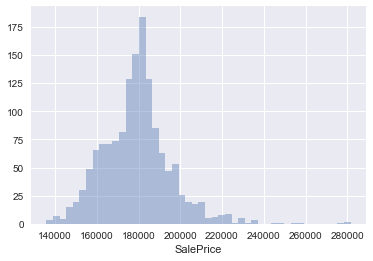

In [1194]:
# Frequency in house prices
sns.distplot(h_data['SalePrice'], kde=None);

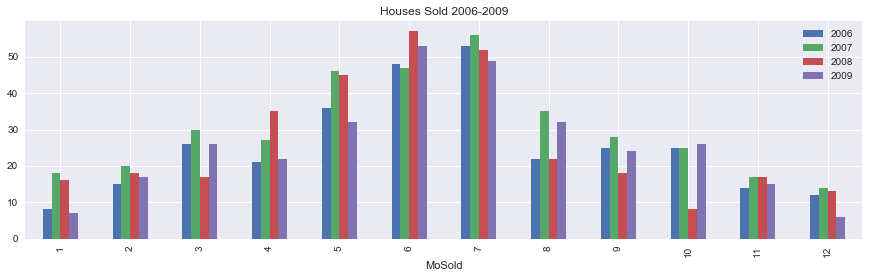

In [1195]:
# NUMBER OF HOUSES SOLD EACH MONTH FOR THE YEAR 2006, 2007, 2008, 2009
h_data1 = h_data[h_data.YrSold == 2006].groupby('MoSold').size()
h_d2006 = h_data1.to_frame()

h_data1 = h_data[h_data.YrSold == 2007].groupby('MoSold').size()
h_d2007 = h_data1.to_frame()

h_data1 = h_data[h_data.YrSold == 2008].groupby('MoSold').size()
h_d2008 = h_data1.to_frame()

h_data1 = h_data[h_data.YrSold == 2009].groupby('MoSold').size()
h_d2009 = h_data1.to_frame()

all_hd = pd.concat([h_d2006, h_d2007, h_d2008, h_d2009], axis=1)
col = ['2006', '2007', '2008', '2009']
all_hd.columns = col
#all_hd.head()
# 2006-2009
all_hd.plot(kind='bar', figsize=(15,4),title='Houses Sold 2006-2009')

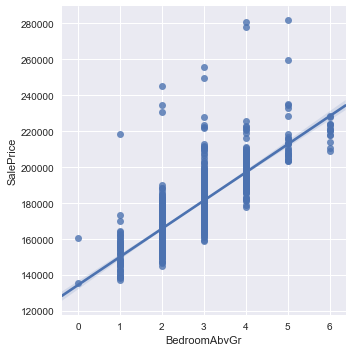

In [1196]:
#scatter plot, relationship between Bedrooms and SalePrice.
sns.lmplot(x="BedroomAbvGr", y="SalePrice", data=h_data)

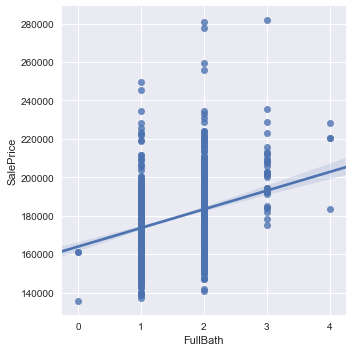

In [1197]:
#scatter plot, relationship between Bathrooms and SalePrice.
sns.lmplot(x="FullBath", y="SalePrice", data=h_data)

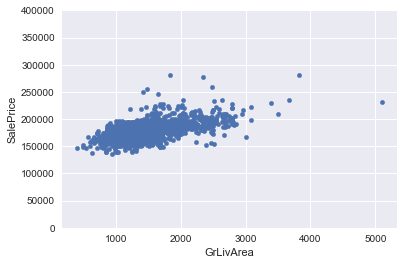

In [1198]:
#scatter plot, relationship between Square footage and price.
sqft_data = pd.concat([h_data['SalePrice'], h_data['GrLivArea']], axis=1)
sqft_data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,400000));

In [1199]:
# Checking for any NaN value.
h_data.isnull().values.any()

False

In [1200]:
# Key characteristics.
h_data1 = h_data[['BedroomAbvGr', 'FullBath', 'GrLivArea', 'SalePrice']].describe().round()
h_data1

,BedroomAbvGr,FullBath,GrLivArea,SalePrice
count,1459.0,1459.0,1459.0,1459.0
mean,3.0,2.0,1486.0,179184.0
std,1.0,1.0,486.0,16518.0
min,0.0,0.0,407.0,135751.0
25%,2.0,1.0,1118.0,168703.0
50%,3.0,2.0,1432.0,179209.0
75%,3.0,2.0,1721.0,186789.0
max,6.0,4.0,5095.0,281644.0


In [1201]:
# Viewing potential outliers
h_data2 = h_data[(h_data.BedroomAbvGr == 0) | (h_data.FullBath == 0)
               |(h_data.YrSold == 0)|(h_data.MoSold == 0)
               |(h_data.GrLivArea >= 4000)|(h_data.SalePrice >= 250000)]
h_data2

,Id,BedroomAbvGr,FullBath,GrLivArea,MoSold,YrSold,SalePrice
399,1860,2,0,1229,6,2009,161157.18
487,1948,3,2,1488,7,2008,255629.49
728,2189,5,3,3820,7,2008,281643.98
790,2251,4,2,1836,1,2008,280618.13
803,2264,4,2,2338,6,2007,277936.13
1053,2514,0,0,1743,5,2007,160927.61
1089,2550,2,2,5095,10,2007,230841.34
1140,2601,0,0,936,6,2007,135751.32
1336,2797,5,2,2486,10,2006,259423.86


In [1202]:
# Filtering non-needed values!
hs_data = h_data[(h_data.YrSold >= 2006) & (h_data.YrSold <= 2009)&
                (h_data.BedroomAbvGr != 0) & (h_data.FullBath != 0)
                & (h_data.GrLivArea <= 4000)]

# ranaming columns
col = ['Id', 'Bedrooms', 'Bathrooms', 'SqFt', 'Month', 'Year', 'SalePrice']
hs_data.columns = col
hs_data.head(3)

,Id,Bedrooms,Bathrooms,SqFt,Month,Year,SalePrice
164,1625,2,1,882,10,2009,177322.00
165,1626,4,2,1434,6,2009,193927.94
166,1627,3,2,1608,7,2009,181715.62


In [1203]:
# HOUSING DATA AVERAGE SALESPRICES FOR EACH MONTH OF EACH YEAR.----------------------------------------------------------------

In [1204]:
# Building dataframe to a series datetime index
hs_data.loc[:, 'Day'] = 1
#h_data.head()

date = pd.to_datetime(hs_data[['Year', 'Month', 'Day']])
hs_data.loc[:, 'Date'] = date
#h_data.head()

# Subtracting only columns needed!
housing_data = hs_data[['Date', 'Bedrooms', 'Bathrooms', 'SqFt', 'SalePrice']]
#housing_data.head()

#Formating 'Id' value to only year and month.
housing_data.loc[:, 'Date'] = housing_data.Date.dt.to_period('M')
#housing_data.head()

# Seting, sorting and renaming index
housing_data = housing_data.set_index('Date').sort_index()
housing_data.head(2)

,Bedrooms,Bathrooms,SqFt,SalePrice
Date,,,,
2006-01,4,2,2064,196858.92
2006-01,3,1,1024,183433.47


In [1232]:
# AVERAGE VALUES FOR EACH COLUMN
hs_data_avg = housing_data.groupby(housing_data.index).mean().round()

# Convert index from Period[M] to object type.
hs_data_avg.index = hs_data_avg.index.map(str)
hs_data_avg.head()

,Bedrooms,Bathrooms,SqFt,SalePrice
Date,,,,
2006-01,3.0,2.0,1690.0,181021.0
2006-02,3.0,2.0,1549.0,174718.0
2006-03,3.0,1.0,1377.0,177407.0
2006-04,3.0,1.0,1271.0,170332.0
2006-05,3.0,2.0,1545.0,180469.0


In [1206]:
# WEATHER DATA -------------------------------------------------------------------------------------------------------------

In [1207]:
weather_d = pd.DataFrame.from_csv('WeatherData/weather.csv', index_col=None)
weather_d.head(1)

,STATION,STATION_NAME,DATE,MXPN,MNPN,EVAP,MDEV,DAEV,SX52,SX53,SX51,SN52,SN53,SN51,MDPR,DAPR,PRCP,SNWD,SNOW,TAVG,TMAX,TMIN,TOBS,WESD,WESF,AWND,WDF2,WDF5,WSF2,WSF5,PGTM,WDMV,WT09,WT01,WT06,WT05,WT02,WT11,WT04,WT08,WT03
0,GHCND:US1IASR0017,AMES 0.9 ENE IA US,20070825,-9999,-9999,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,0.09,-9999.0,0.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


In [1236]:
# Sorting to data needed
weather_d1 = weather_d[weather_d.STATION_NAME == 'AMES 8 WSW IA US']
weather_d2 = weather_d1[(weather_d1.DATE >= 20060101) & (weather_d1.DATE <= 20091231)]
weather_d3 = weather_d2[['DATE', 'PRCP', 'SNOW', 'TMAX', 'TMIN']]

# Getting date to datetime, setting and sortinging index to ('Date')
weather_d3.loc[:, 'Date'] = pd.to_datetime(weather_d3.DATE, format='%Y%m%d')
weather_d4 = weather_d3[['Date', 'PRCP', 'SNOW', 'TMAX', 'TMIN']]
#print(weather_d4)
weather_d4['Date'] =weather_d4.Date.dt.to_period('M')
weather_data = weather_d4.set_index('Date').sort_index()

# Convert index from Period[M] to object type.
wth_data_avg.index = wth_data_avg.index.map(str)
wth_data_avg.head()

,PRCP,SNOW,TMAX,TMIN
Date,,,,
2006-01,0.02,0.06,41.42,25.84
2006-02,-357.09,0.07,40.61,14.46
2006-03,-322.46,-322.32,47.26,27.90
2006-04,0.14,0.00,67.97,43.03
2006-05,0.07,0.00,74.48,51.23


In [1248]:
# WEATHER AVERAGES FOR EACH MONTH OF EACH YEAR.
wth_data_avg = weather_data.groupby(weather_data.index).mean()
col = ['Avg_Prcp', 'Avg_Snow', 'Avg_Tmax', 'Avg_Tmin']
wth_data_avg.columns = col

wth_data_avg.index = wth_data_avg.index.map(str)
wth_data_avg.head(2)

,Avg_Prcp,Avg_Snow,Avg_Tmax,Avg_Tmin
Date,,,,
2006-01,0.02,0.06,41.42,25.84
2006-02,-357.09,0.07,40.61,14.46


In [1210]:
# MERGING HOUSING AND WEATHER DATA --------------------------------------------------------------------------------------------

In [1243]:
hs_wth_data = hs_data_avg.join(wth_data_avg)
hs_wth_data

,Bedrooms,Bathrooms,SqFt,SalePrice,PRCP,SNOW,TMAX,TMIN
Date,,,,,,,,
2006-01,3.0,2.0,1690.0,181021.0,2.00e-02,0.06,41.42,25.84
2006-02,3.0,2.0,1549.0,174718.0,-3.57e+02,0.07,40.61,14.46
2006-03,3.0,1.0,1377.0,177407.0,-3.22e+02,-322.32,47.26,27.90
2006-04,3.0,1.0,1271.0,170332.0,1.43e-01,0.00,67.97,43.03
2006-05,3.0,2.0,1545.0,180469.0,6.94e-02,0.00,74.48,51.23
2006-06,3.0,1.0,1434.0,177371.0,2.70e-02,0.00,82.97,60.27
2006-07,3.0,2.0,1464.0,182576.0,1.79e-01,0.00,86.58,65.42
2006-08,3.0,2.0,1601.0,187579.0,1.99e-01,0.00,82.23,63.39
2006-09,3.0,2.0,1632.0,192111.0,2.50e-01,0.00,72.43,50.40
